<a href="https://colab.research.google.com/github/anujapande2001/MLProjects/blob/main/MedicalCostPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Cost Prediction**

# **1. Introduction**

Your client for this project is an insurance provider.


*   XYZ Health Insurance Co. Ltd. is one of the prominent insurance providers in the country.
*   They offer impressive health plans and services to cater to the needs of different people.
*   The insurance company also provides access to fitness assessment centers, wellness centers, diagnostic centers in addition to hospitalization centers.

**Current Scenario**

The company is planning to introduce a new system that will help to easily monitor and predict the medical insurance prices of their customers.









# **2. Problem Statement**
**The current process suffers from the following problems:**

*   The company uses manpower to predict the medical expenses of its insurers. Many factors are considered such as age, BMI, smoking habits, number of children, etc.
*   The company plans to modernize its legacy systems and wants to implement an automated way of predicting the medical expenses of its insurers based on various factors.

The company has hired you as data science consultants. They want to automate the process of assigning the drug according to their health report.

**Your Role**
*   You are given a historical dataset that contains the medical charges of some of the insurers and many factors that determine those charges.
*   Your task is to build a regression model using the dataset.
*   Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.


# **3. Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler,RobustScaler
# import sklearn.linear_model.LogisticRegression as LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.utils import shuffle

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate,KFold
from sklearn.preprocessing import OneHotEncoder

# **4. Data Acquisition & Description**

In [3]:
data=pd.read_csv("/content/drive/MyDrive/TermProjects/MedicalCost/train_data.csv")
dataValidation=pd.read_csv("/content/drive/MyDrive/TermProjects/MedicalCost/test_data.csv")
dataValidationId=dataValidation.id
data.head(10)



,age,sex,bmi,children,smoker,region,id,charges
0,24,male,23.655,0,no,northwest,693,2352.96845
1,28,female,26.510,2,no,southeast,1297,4340.44090
2,51,male,39.700,1,no,southwest,634,9391.34600
3,47,male,36.080,1,yes,southeast,1022,42211.13820
4,46,female,28.900,2,no,southwest,178,8823.27900
5,63,female,26.220,0,no,northwest,287,14256.19280
6,38,female,19.950,2,no,northeast,1290,7133.90250
7,28,female,26.315,3,no,northwest,1113,5312.16985
8,25,male,26.800,3,no,southwest,294,3906.12700
9,18,female,30.115,0,no,northeast,471,2203.47185


### **4.1 Data Information**

- In this section we will see the **information about the types of the features**.




In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
 6   id        1003 non-null   int64  
 7   charges   1003 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.8+ KB


### **4.2 Data Description**

- In this section we will get **information about the data** and see some observations.

In [5]:
data[data.smoker=="yes"].describe()

,age,bmi,children,id,charges
count,206.000000,206.000000,206.000000,206.000000,206.000000
mean,38.208738,30.494053,1.165049,685.354369,31795.180787
std,14.027851,6.170920,1.173671,405.069974,11623.204654
min,18.000000,17.195000,0.000000,0.000000,12829.455100
25%,25.000000,25.942500,0.000000,304.250000,20184.215710
50%,37.500000,30.205000,1.000000,726.000000,34210.163175
75%,49.000000,34.875000,2.000000,1036.750000,40939.071425
max,64.000000,47.600000,5.000000,1337.000000,62592.873090


In [7]:
dataValidation[dataValidation.bmi>50].count()

age         1
sex         1
bmi         1
children    1
smoker      1
region      1
id          1
dtype: int64

# **5. Data Pre-Processing**

### **5.1 Data Pre-Profiling**

**Check null value or any other inconsistent value in column**

In [ ]:
(data==0).sum()

age           0
sex           0
bmi           0
children    425
smoker        0
region        0
id            1
charges       0
dtype: int64

In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
id          0
charges     0
dtype: int64

In [ ]:
(data=="Unknown").sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
id          0
charges     0
dtype: int64

In [ ]:
data.duplicated().any()

False

### **5.2 Data Cleaning**

- N/A

# **6. Exploratory Data Analysis**

### **Detect Outliers and distribution of numerical features**

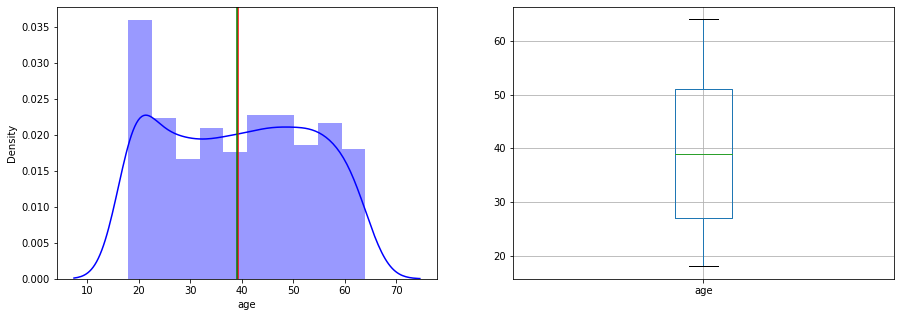

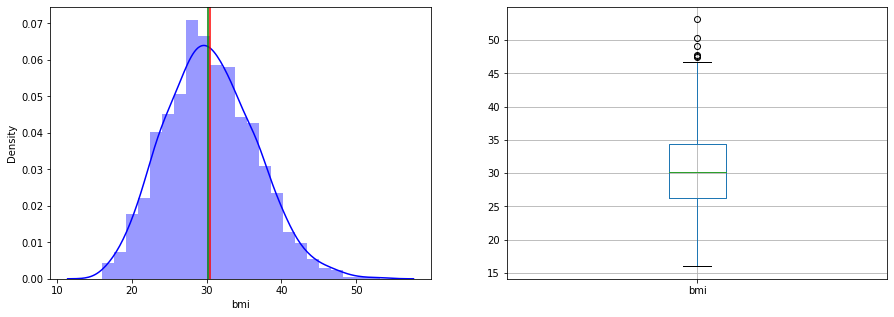

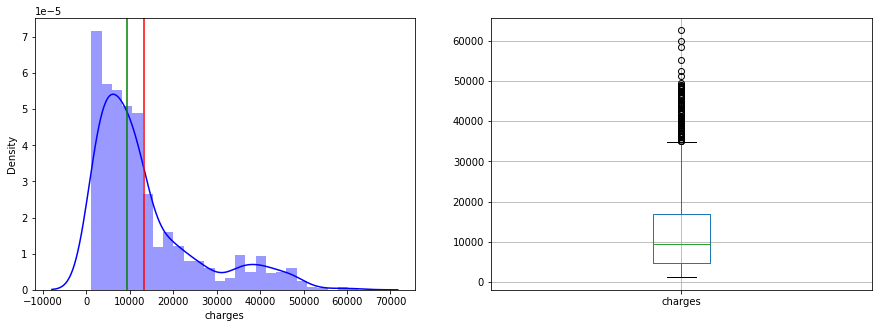

In [ ]:
Contcolumn=["age","bmi","charges"]
for col in Contcolumn:
  fig=plt.figure(figsize=[15,5])
  plt.subplot(1,2,1)
  sns.distplot(data[col], color="b")
  plt.axvline(data[col].mean(), color="r")
  plt.axvline(data[col].median(), color="g")
  plt.subplot(1,2,2)
  data.boxplot(column=col)



### **Check the distribution of categorical features**

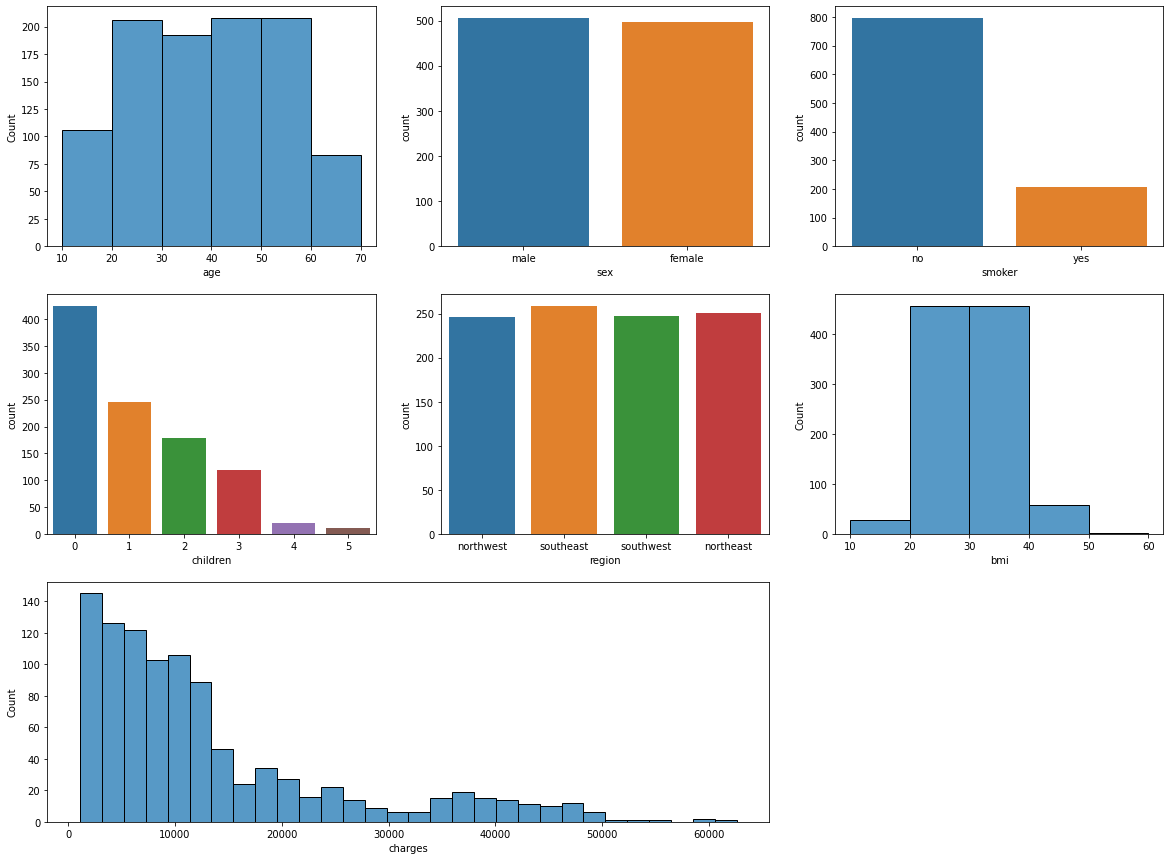

In [ ]:
fig=plt.figure(figsize=[20,15])
plt.subplot(3,3,1)
sns.histplot(x="age",bins=np.arange(10,80,10), data=data)
# plt.xticks(rotation=45)
plt.subplot(3,3,2)
sns.countplot(x="sex",data=data)

plt.subplot(3,3,3)
sns.countplot(x="smoker",data=data)

plt.subplot(3,3,4)
sns.countplot(x="children",data=data)

plt.subplot(3,3,5)
sns.countplot(x="region",data=data)

plt.subplot(3,3,6)
sns.histplot(x="bmi",bins=np.arange(10,70,10), data=data)

plt.subplot(3,3,(7,8))
sns.histplot(x="charges",bins=30, data=data)



### **Analyzing Charges Vs Other Parameters**

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

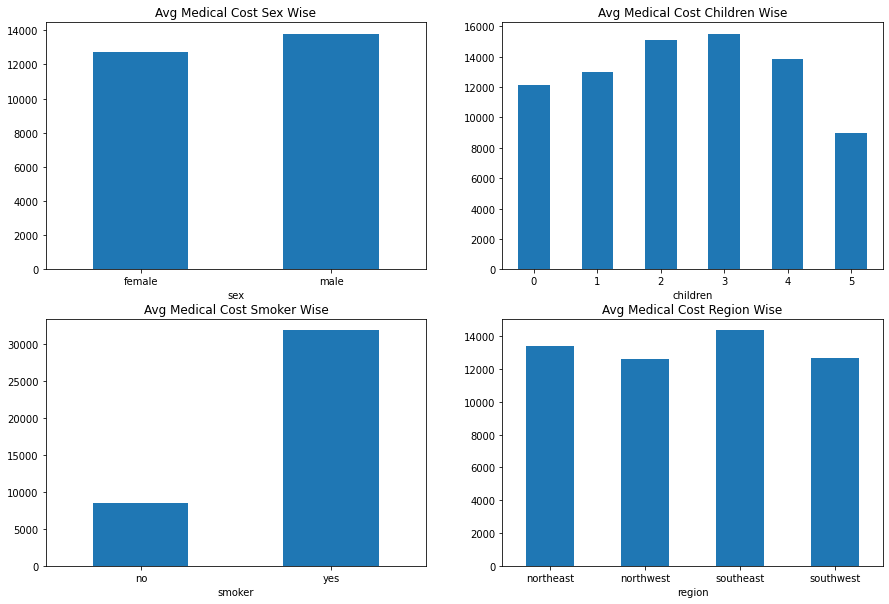

In [ ]:
fig=plt.figure(figsize=[15,10])
plt.subplot(2,2,1)

data.groupby("sex")["charges"].mean().plot.bar()
plt.title("Avg Medical Cost Sex Wise")
plt.xticks(rotation=0)

plt.subplot(2,2,2)
data.groupby("children")["charges"].mean().plot.bar()
plt.title("Avg Medical Cost Children Wise")
plt.xticks(rotation=0)

plt.subplot(2,2,3)
data.groupby("smoker")["charges"].mean().plot.bar()
plt.title("Avg Medical Cost Smoker Wise")
plt.xticks(rotation=0)

plt.subplot(2,2,4)
data.groupby("region")["charges"].mean().plot.bar()
plt.title("Avg Medical Cost Region Wise")
plt.xticks(rotation=0)



### **Checking if relationship is linear between input features and target variable**

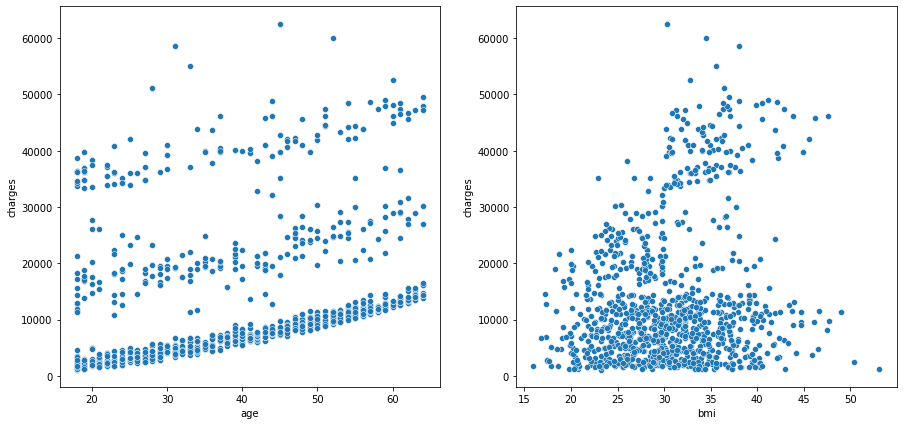

In [ ]:
fig=plt.figure(figsize=[15,7])
plt.subplot(1,2,1)
sns.scatterplot(x="age", y="charges",data=data)
plt.subplot(1,2,2)
sns.scatterplot(x="bmi", y="charges",data=data)

## **Check Multicolinearity**

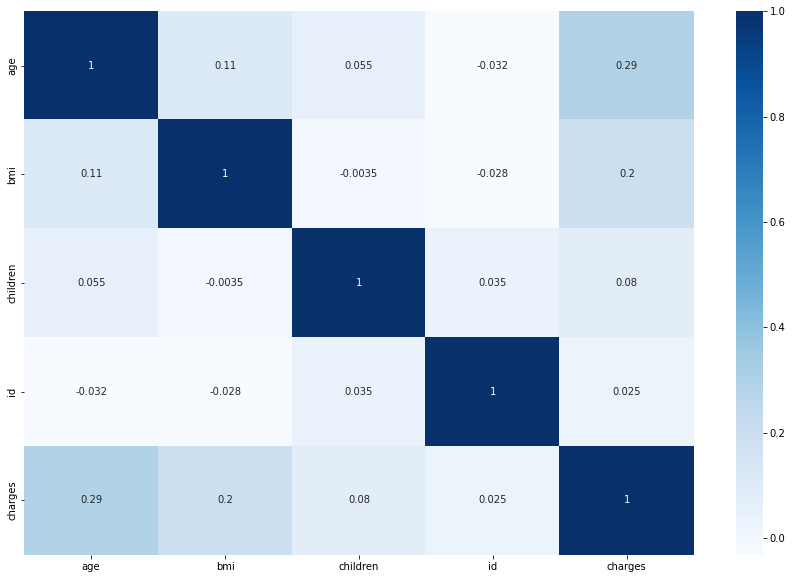

In [ ]:
figure=plt.figure(figsize=[15,10])
sns.heatmap(data.corr(), cmap="Blues", annot=True,linecolor="white")


# **7. Data Post-Processing**

### **7.1 Data Preparation/Feature Selection**

In [ ]:
features=["age","bmi","children","smoker","region"]
X=data[features]
y=data.charges
dataValidation=dataValidation[features]


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
 6   id        1003 non-null   int64  
 7   charges   1003 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.8+ KB


# **8. Model Development & Evaluation**

## **Linear Regression**

In [ ]:
num_col=["age","bmi","children"]
cat_col=["smoker","region"]

modelLR=LinearRegression()
col_trans=make_column_transformer((OneHotEncoder(),cat_col),(RobustScaler(),num_col))
kf=KFold(5,shuffle=True,random_state=1)
pipeLR=make_pipeline(col_trans,modelLR)
cv_score=cross_validate(pipeLR,X,y,cv=kf,scoring="r2",n_jobs=-1,return_train_score=True)
cv_score_df=pd.DataFrame(cv_score)
print(cv_score_df.mean())
pipeLR.fit(X,y)
y_pred=pipeLR.predict(X)


fit_time       0.015671
score_time     0.008240
test_score     0.731833
train_score    0.745069
dtype: float64


In [ ]:
sns.regplot(y_pred,y)
plt.title("Predicted Vs Actual in Train data")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")

### **Checking Assumption of Linear Regression**

Text(0.5, 1.0, 'Checking Distribution of Residual in Train Data')

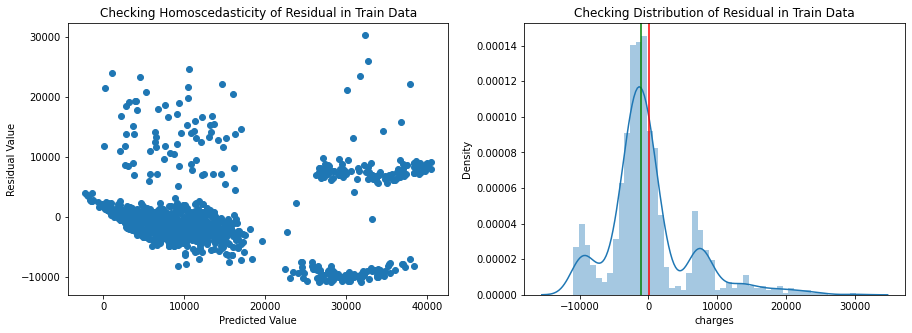

In [ ]:
figure=plt.figure(figsize=[15,5])
# Checking Homoscedasticity of Residual
plt.subplot(1,2,1)

plt.scatter(y_pred,y-y_pred)
plt.title("Checking Homoscedasticity of Residual in Train Data")
plt.xlabel("Predicted Value")
plt.ylabel("Residual Value")


# Checking Distribution of residual
plt.subplot(1,2,2)
sns.distplot(y-y_pred)
plt.axvline((y-y_pred).mean(), color="r")
plt.axvline((y-y_pred).median(), color="g")
plt.title("Checking Distribution of Residual in Train Data")


## **Decision Tree Regression**

### **Make Pipeline**

In [ ]:
col_trans=make_column_transformer((OneHotEncoder(),cat_col),remainder="passthrough")
pipeDT=make_pipeline(col_trans,DecisionTreeRegressor(random_state=47))
kf=KFold(8,shuffle=True,random_state=1)

### **Decision Tree Regression-Default Model**

In [ ]:
cv_score=cross_validate(pipeDT,X,y,cv=kf,scoring="r2",n_jobs=-1,return_train_score=True)
cv_score_df=pd.DataFrame(cv_score)
cv_score_df.mean()


fit_time       0.015449
score_time     0.005392
test_score     0.661077
train_score    0.998921
dtype: float64

### **HyperParameter Tuning of Decision Tree using RandomSearch**

In [ ]:
param_list={
            "decisiontreeregressor__criterion" : ["squared_error", "absolute_error", "poisson"],
             "decisiontreeregressor__splitter":["best","random"],
            "decisiontreeregressor__max_depth" : [None,2,3,4,5,6],
           "decisiontreeregressor__min_samples_leaf":[1,2,3,4,5],
            # "min_samples_split" :[2,3,4,5],
           "decisiontreeregressor__min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7],
           "decisiontreeregressor__max_features":["auto","log2","sqrt",None],
           "decisiontreeregressor__max_leaf_nodes":[None,10,20,30,40,50]
            }

modelDTRandomCV=RandomizedSearchCV(pipeDT,param_list,cv=kf,scoring="r2",
                                   n_jobs=-1,n_iter=100,return_train_score=True,random_state=15)
modelDTRandomCV.fit(X,y)
results=pd.DataFrame(modelDTRandomCV.cv_results_)


In [ ]:
print(modelDTRandomCV.best_score_ )
print(modelDTRandomCV.best_estimator_)
print(modelDTRandomCV.best_params_)
results[["mean_train_score","mean_test_score"]].sort_values(ascending=False,by="mean_test_score")

0.8369647766283592


,mean_train_score,mean_test_score
52,0.853193,0.836965
20,0.859435,0.831345
81,0.891183,0.821753
66,0.820804,0.807535
31,0.809748,0.802462
...,...,...
69,NaN,NaN
70,NaN,NaN
76,NaN,NaN
92,NaN,NaN


## **Random Forest**

### **Make Pipeline**

In [ ]:
pipeRF=make_pipeline(col_trans,RandomForestRegressor(random_state=50))

### **Random Forest- Default Model**

In [ ]:
cv_score=cross_validate(pipeRF,X,y,scoring="r2",cv=kf,n_jobs=-1,return_train_score=True)
cv_score_df=pd.DataFrame(cv_score)
cv_score_df.mean()

fit_time       0.423546
score_time     0.023305
test_score     0.816064
train_score    0.975905
dtype: float64

### **Hypertuning of Random Forest using RandomSearchCV**

In [ ]:
param_list={
            "randomforestregressor__criterion" : ["squared_error", "absolute_error", "poisson"],
            "randomforestregressor__max_depth" : [None,2,3,4,5,6],
           "randomforestregressor__min_samples_leaf":[1,2,3,4,5],
          #  "min_samples_split" :[2,3,4,5],
           "randomforestregressor__min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5,0.6],
           "randomforestregressor__max_features":["auto","log2","sqrt",None],
             "randomforestregressor__n_estimators": [100, 400, 700],
           "randomforestregressor__max_leaf_nodes":[None,10,20,30,40,50]
            }


modelRFRandomCV=RandomizedSearchCV(pipeRF,param_list,cv=kf,n_jobs=-1,
                                   n_iter=150, random_state=30,return_train_score=True)
modelRFRandomCV.fit(X,y)
results=pd.DataFrame(modelRFRandomCV.cv_results_)
results[["mean_train_score","mean_test_score"]].sort_values(ascending=False,by="mean_test_score")

,mean_train_score,mean_test_score
43,0.864166,0.843197
69,0.916925,0.838245
99,0.929837,0.834280
70,0.848342,0.833949
131,0.856822,0.828042
...,...,...
114,NaN,NaN
123,NaN,NaN
129,NaN,NaN
137,NaN,NaN


## **Predict Output using Test File**

In [ ]:
# Selected Hypertuned Random Forest Model for prediction
datavalidation_pred=modelRFRandomCV.predict(dataValidation)
submission = pd.DataFrame({'Id':dataValidationId,'Charge':datavalidation_pred})
from google.colab import files
submission.to_csv('submission.csv', encoding = 'utf-8-sig',index=False,header=False) 
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>